#전 세계 개발자 현황 분석

##프로젝트 개요
- 문제 정의

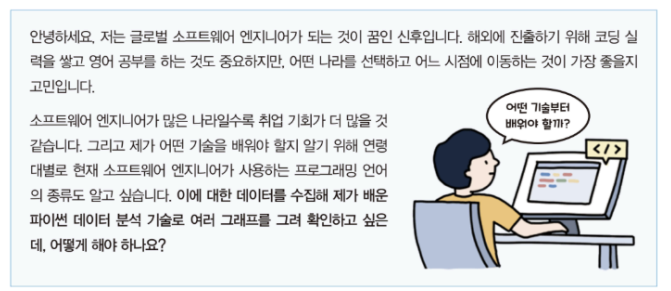

##데이터 수집
- 구글링 : developer survey result
- stack overflow 개발자들이 많이 사용하는 웹 사이트
- Dataset :  https://survey.stackoverow.co/
- survey_results_public.csv 파일 사용

##데이터 읽어 오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025_cheonan/survey_results_public.csv')

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [4]:
raw_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


###필요한 열만 추출하기
- Age : 나이
- Country : 국가 정보
- LanguageHaveWorkedWith : 다룰 줄 아는 프로그래밍 언어
- LearnCode : 프로그래밍을 배운 방법

In [6]:
#column에 특정 열이 있는지 검색
print('Country' in raw_data.columns)
print('LanguageHaveWorkedWith' in raw_data.columns)
print('LearnCode' in raw_data.columns)

True
True
True


In [8]:
revised_data = raw_data[["Age", "Country", "LanguageHaveWorkedWith", "LearnCode"]]

revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,Under 18 years old,United States of America,NaN,Books / Physical media
1,35-44 years old,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Books / Physical media;Colleague;On the job tr...
2,45-54 years old,United Kingdom of Great Britain and Northern I...,C#,Books / Physical media;Colleague;On the job tr...
3,18-24 years old,Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,"Other online resources (e.g., videos, blogs, f..."
4,18-24 years old,Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust,"Other online resources (e.g., videos, blogs, f..."


###특정 열 데이터 조회

In [9]:
revised_data['Age']

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old
...,...
65432,18-24 years old
65433,25-34 years old
65434,25-34 years old
65435,18-24 years old


####중복값 제거
- drop_duplicates()

In [10]:
revised_data['Age'].drop_duplicates()

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
14,25-34 years old
23,55-64 years old
30,Prefer not to say
48,65 years or older


###데이터 그룹화하기
- 데이터 그룹화 객체 만들기
- groupby():pandas에서 데이터를 그룹화하는 메서드(함수)

In [11]:
revised_data.groupby(['Age'])

###데이터 그룹별 크기 구하기
ref:https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html#pandas.core.groupby.DataFrameGroupBy.size


In [12]:
size_by_age = revised_data.groupby(['Age']).size()
size_by_age

,0
Age,
18-24 years old,14098
25-34 years old,23911
35-44 years old,14942
45-54 years old,6249
55-64 years old,2575
65 years or older,772
Prefer not to say,322
Under 18 years old,2568


###국가별 응답 숫자 확인

In [13]:
size_by_country = revised_data.groupby(['Country']).size()
size_by_country

,0
Country,
Afghanistan,56
Albania,49
Algeria,77
Andorra,15
Angola,20
...,...
"Venezuela, Bolivarian Republic of...",69
Viet Nam,296
Yemen,18


##데이터 시각화

###연령대별 응답자 수 그래프 그리기
- 선 그래프

<Axes: xlabel='Age'>

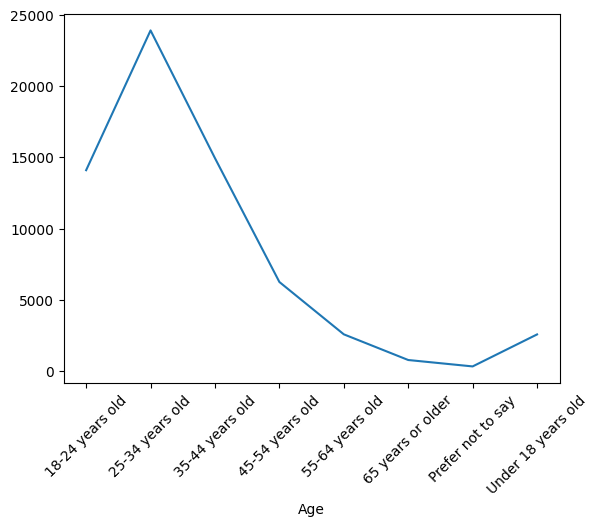

In [14]:
size_by_age.plot.line(rot=45)

- 막대 그래프

<Axes: xlabel='Age'>

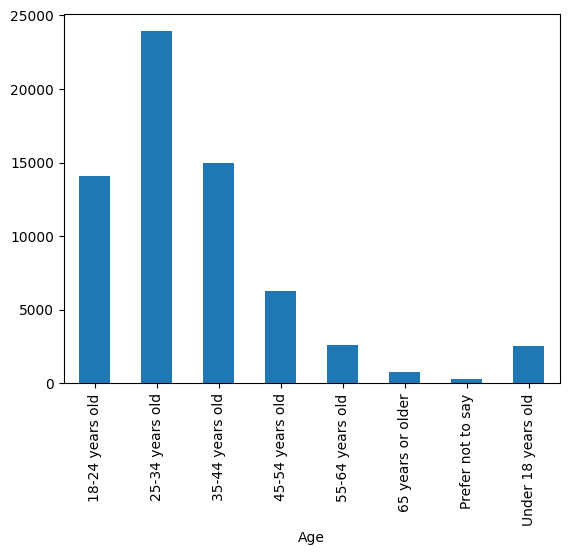

In [15]:
size_by_age.plot.bar()

- 수평 막대 그래프

<Axes: ylabel='Age'>

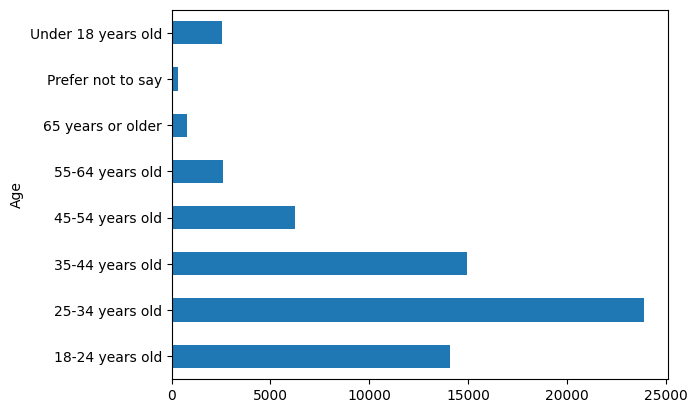

In [16]:
size_by_age.plot.barh()

###그룹 색인 순서 변경

In [17]:
#현재 index 확인
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

####색인 변경
- reindex() method
- 순서는 그래프 하단에서 상단으로 표시

In [18]:
reindexed_size_by_age = size_by_age.reindex(index = ['Prefer not to say', '65 years or older','55-64 years old','45-54 years old','35-44 years old', '25-34 years old', '18-24 years old','Under 18 years old'])
reindexed_size_by_age

,0
Age,
Prefer not to say,322
65 years or older,772
55-64 years old,2575
45-54 years old,6249
35-44 years old,14942
25-34 years old,23911
18-24 years old,14098
Under 18 years old,2568


<Axes: ylabel='Age'>

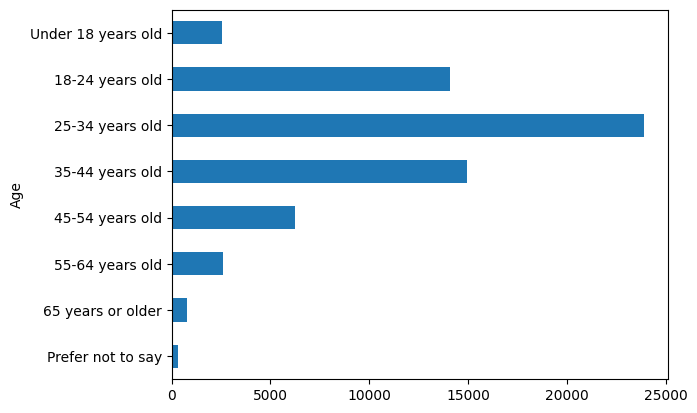

In [19]:
reindexed_size_by_age.plot.barh()

###국가별 응답자 수 그래프 그리기

<Axes: >

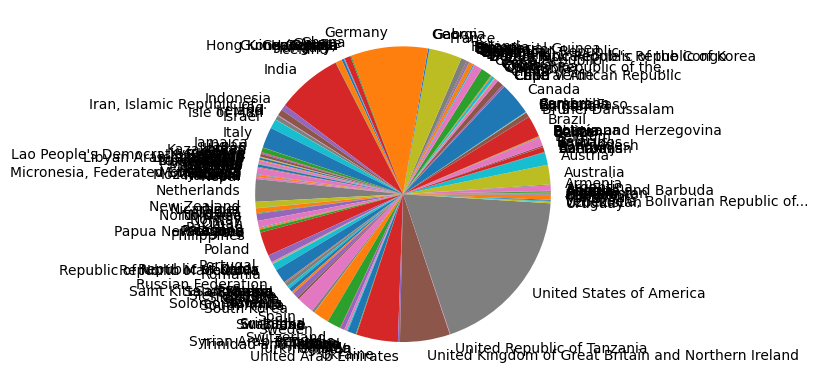

In [20]:
size_by_country.plot.pie()

- pie 사이즈 조정

<Axes: >

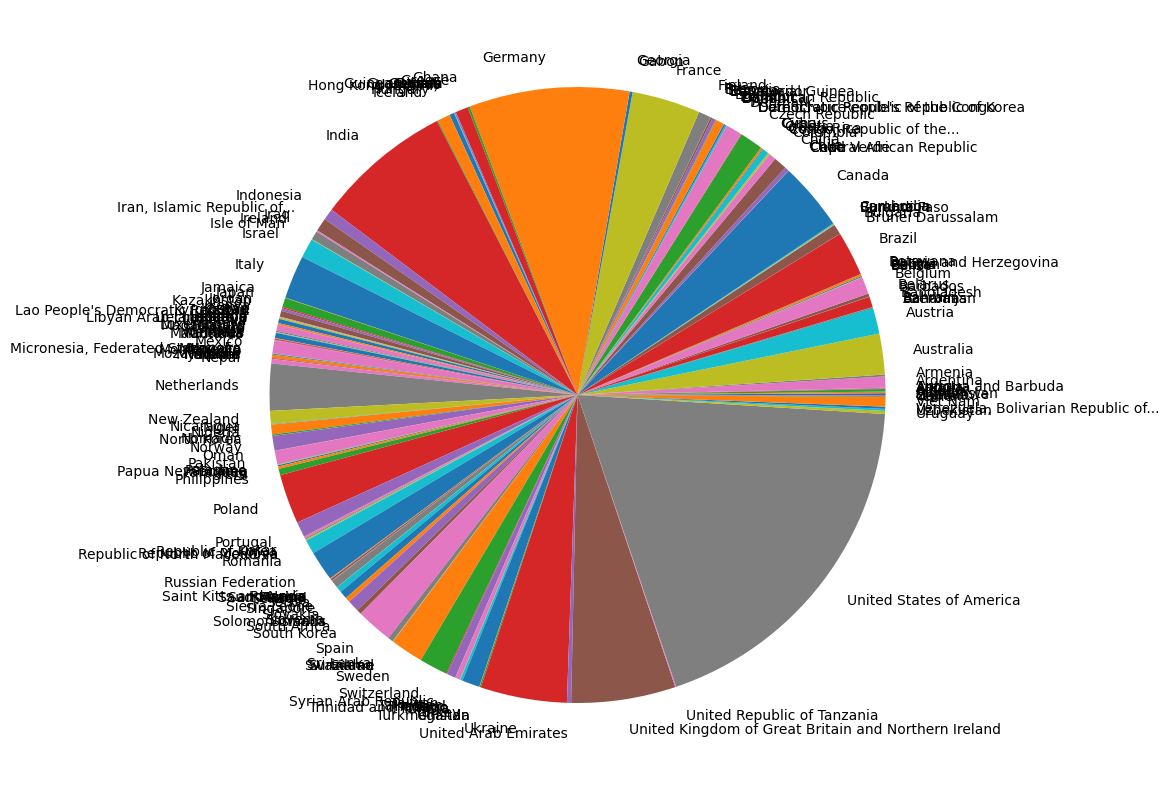

In [21]:
size_by_country.plot.pie(figsize=(10,10))

####상위 20개만 표현
- nlargest() : 데이터프레임에서 상위 N개 데이터 추출 메서드

In [22]:
size_by_country.nlargest(20)

,0
Country,
United States of America,11095
Germany,4947
India,4231
United Kingdom of Great Britain and Northern Ireland,3224
Ukraine,2672
France,2110
Canada,2104
Poland,1534
Netherlands,1449


<Axes: >

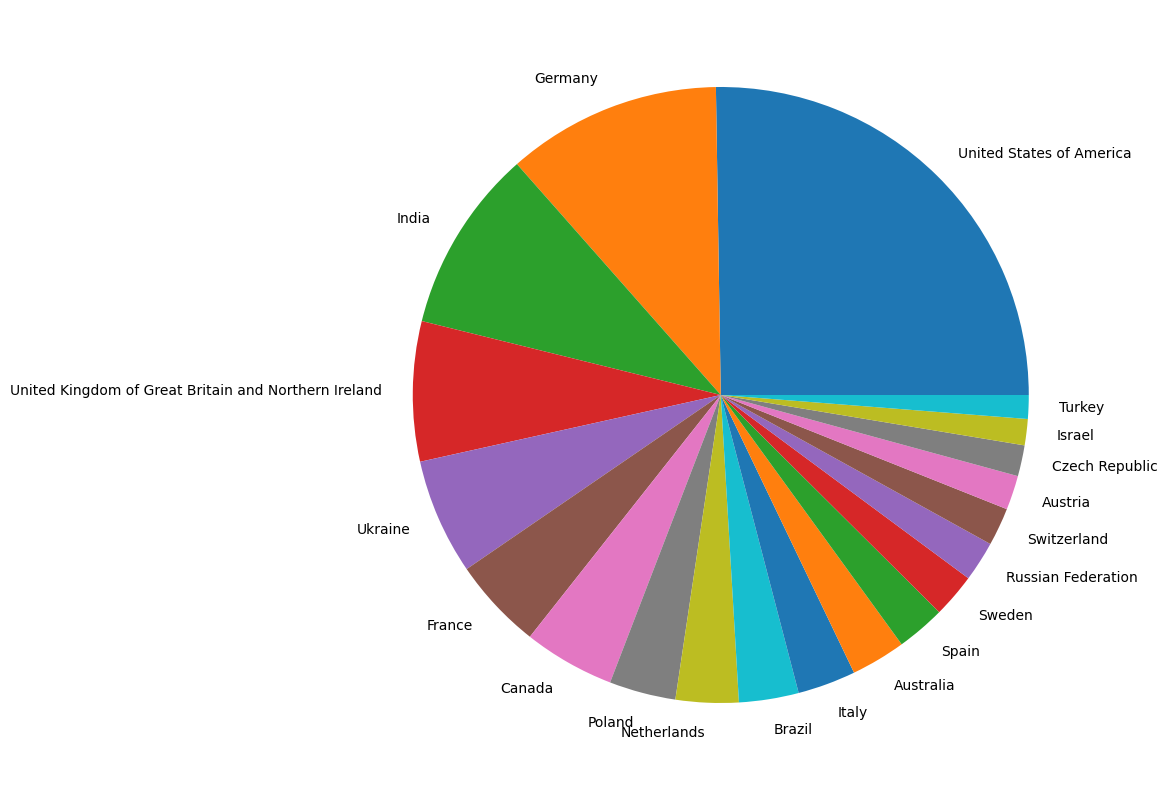

In [23]:
size_by_country.nlargest(20).plot.pie(figsize=(10,10))

###많이 사용하는 언어 그래프 그리기
- 프로그래밍 언어 데이터 추출 : LanguageHaveWorkedWith

In [24]:
languages = revised_data['LanguageHaveWorkedWith']
languages

,LanguageHaveWorkedWith
0,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,C#
3,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4,C++;HTML/CSS;JavaScript;Lua;Python;Rust
...,...
65432,NaN
65433,NaN
65434,NaN
65435,C;C++;Go;Lua;Objective-C;Python;Rust;SQL


#### 단일 객체를 리스트로 변환
- split(): 프로그래밍 언어별 그룹화를 위해서 각 프로그래밍 언어를 하나의 값으로 쪼개야 함

In [25]:
languages = languages.str.split(";")
languages

,LanguageHaveWorkedWith
0,NaN
1,"[Bash/Shell (all shells), Go, HTML/CSS, Java, ..."
2,[C#]
3,"[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe..."
4,"[C++, HTML/CSS, JavaScript, Lua, Python, Rust]"
...,...
65432,NaN
65433,NaN
65434,NaN
65435,"[C, C++, Go, Lua, Objective-C, Python, Rust, SQL]"


###리스트의 각 항목을 열로 나누기
- explode(): 리스트의 항목을 행으로 나누는 메서드

In [26]:
exploded_languages = languages.explode()
exploded_languages

,LanguageHaveWorkedWith
0,NaN
1,Bash/Shell (all shells)
1,Go
1,HTML/CSS
1,Java
...,...
65436,Java
65436,JavaScript
65436,PHP
65436,Python


###프로그래밍별 응답 수 확인

In [27]:
size_by_languages = exploded_languages.groupby(exploded_languages).size()
size_by_languages

,LanguageHaveWorkedWith
LanguageHaveWorkedWith,
Ada,542
Apex,502
Assembly,3233
Bash/Shell (all shells),20412
C,12184
C#,16318
C++,13827
Clojure,737
Cobol,413


<Axes: ylabel='LanguageHaveWorkedWith'>

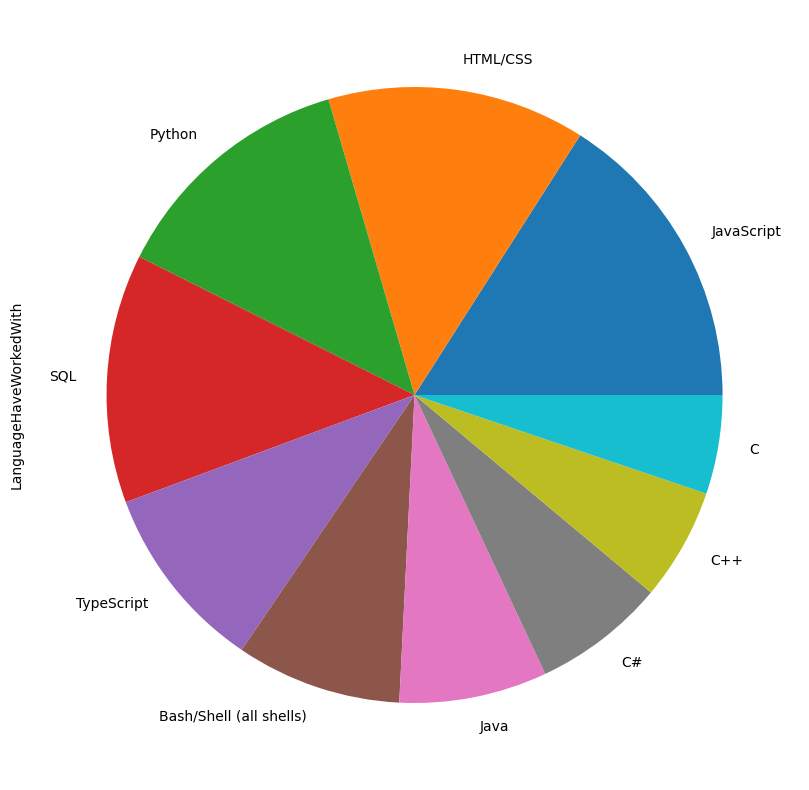

In [28]:
size_by_languages.nlargest(10).plot.pie(figsize=(10,10))

###백분율 표기

<Axes: ylabel='LanguageHaveWorkedWith'>

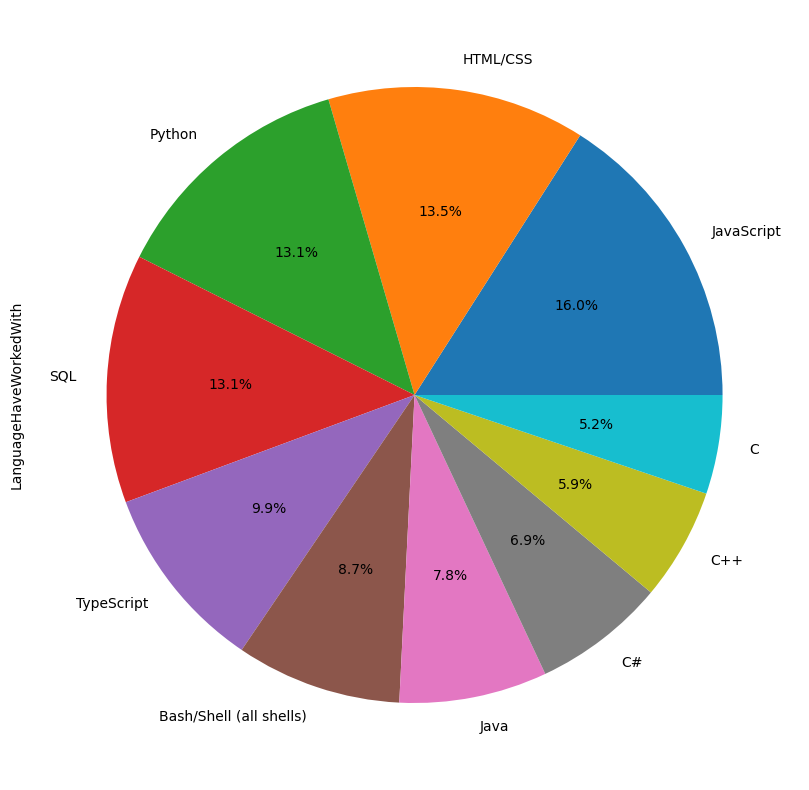

In [29]:
size_by_languages.nlargest(10).plot.pie(figsize=(10,10), autopct='%1.1f%%')

###원하는 연령대 데이터만 추출해 그래프 그리기

In [31]:
#25-34세 연령대가 사용한 프로그래밍 언어 정보 추출
languages_for_25_34 = revised_data[revised_data.Age == '25-34 years old']["LanguageHaveWorkedWith"]

#데이터 확인
languages_for_25_34

,LanguageHaveWorkedWith
14,C;C++
18,C#;HTML/CSS;JavaScript;PHP;Python;SQL
20,Bash/Shell (all shells);HTML/CSS;PHP;Python;SQ...
27,Bash/Shell (all shells);Lua;TypeScript
28,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...
...,...
65424,NaN
65427,MATLAB;Python;SQL
65428,NaN
65433,NaN


<Axes: ylabel='LanguageHaveWorkedWith'>

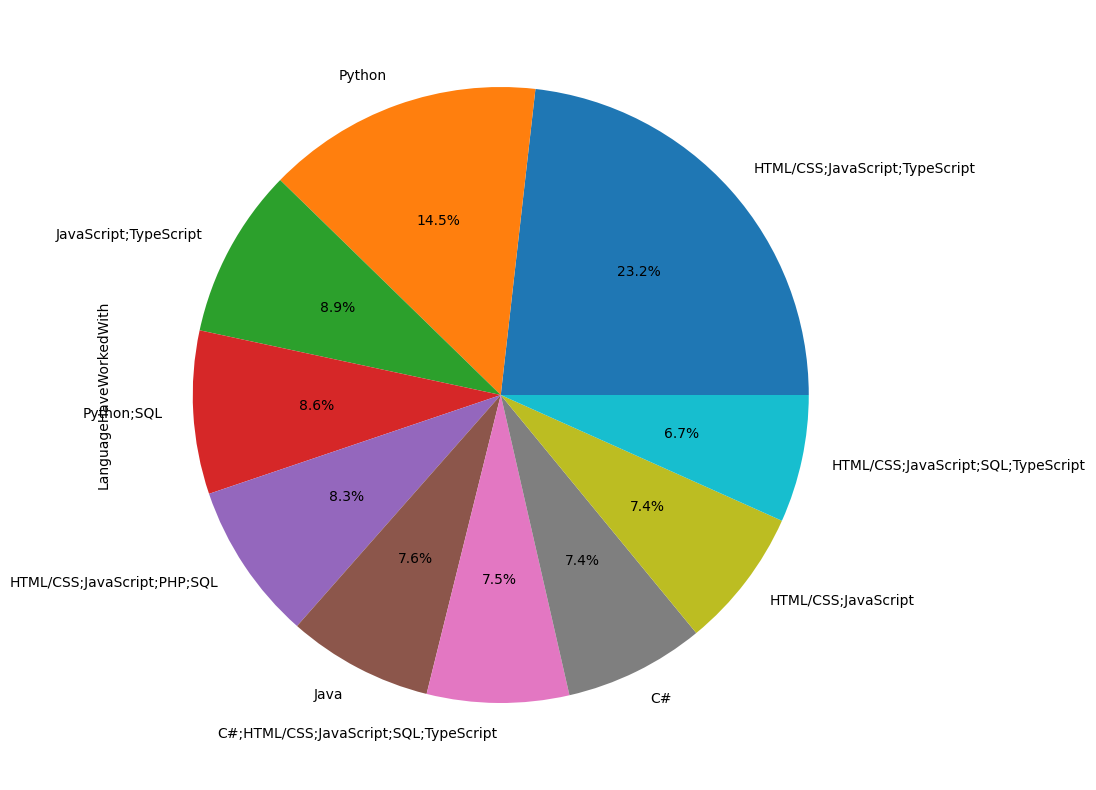

In [33]:
#상위 10개 데이터 파이 그래프 그리기
languages_for_25_34.groupby(languages_for_25_34).size().nlargest(10).plot.pie(figsize=(10,10), autopct='%1.1f%%')